# Tugas 2

1. Silahkan mencari dataset untuk klasifikasi, dan buat model MLP untuk klasifikasi
2. Silahkan mencari dataset untuk regresi, dan buat model MLP untuk regresi
3. Tampilkan masing-masing performa model klasifikasi dan regresi

In [1]:
# mlp for classification
# dataset klasifikasi HIV : https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction
# dataset regresi fuel consumption : https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption
import pandas as pd

df = pd.read_csv('data/AIDS_Classification.csv')

df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

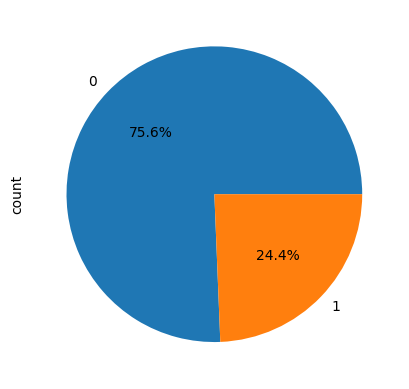

In [3]:
import matplotlib.pyplot as plt


df['infected'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# 0 = not infected, 1 = infected change label
plt.show()

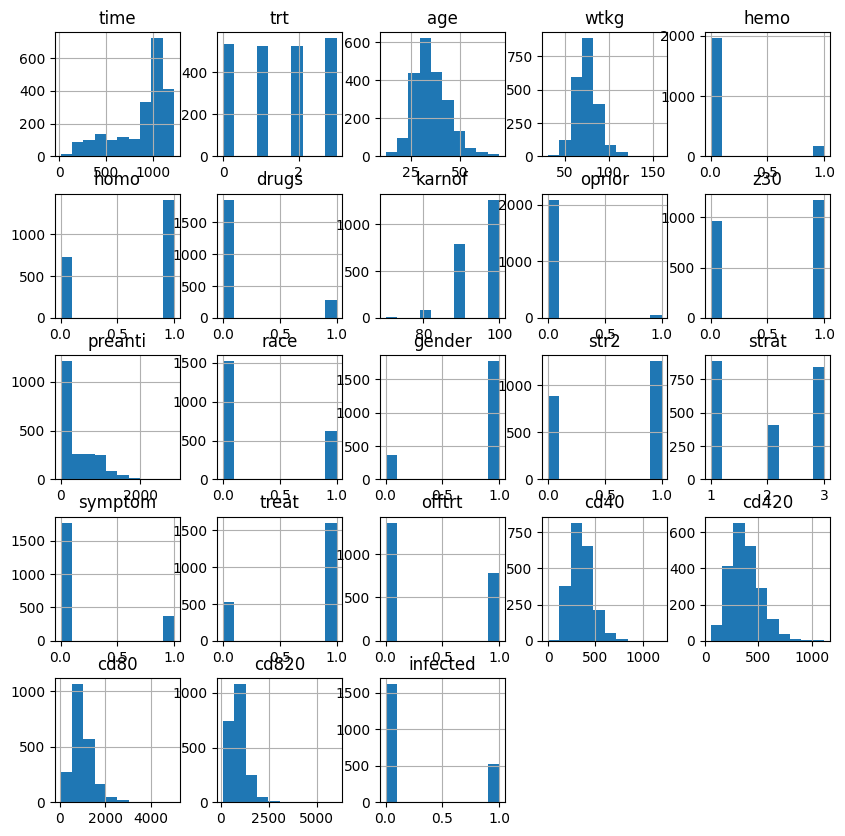

In [4]:
df.hist(figsize=(10,10))
plt.show()

In [5]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [6]:
df_X = df.drop(['time', 'infected'],axis=1)
df_y = df[['infected']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index([], dtype='object')


In [7]:
# mlp for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPClassifier


#menyimpan X dan y menjadi numpy arrays
X = df_X.astype(float).values
y = df_y.astype(float)
#hold-out method, dibagi menjadi training dan testing set. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning
model=MLPClassifier(max_iter=500)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

In [8]:
model.coefs_

[array([[-0.0171257 , -0.60990616,  0.20782429, ..., -0.28261393,
         -0.33124281,  0.11956333],
        [ 0.0091618 ,  0.13595455,  0.08548365, ..., -0.14603131,
          0.55943551,  0.14606079],
        [ 0.52001286,  0.29181179,  0.12145411, ..., -0.65877564,
         -0.24557754,  0.02909876],
        ...,
        [-0.14268931, -0.09717444, -0.56320719, ...,  0.0545388 ,
          0.29768073,  0.37846476],
        [-0.22881493,  0.28881596, -0.16039123, ..., -0.22142487,
          0.07446128, -0.65592174],
        [ 0.00289146, -0.14247837,  0.40698352, ...,  0.35528853,
         -0.66384353,  0.27952247]]),
 array([[-0.78958969],
        [ 0.65091891],
        [ 0.66147402],
        [-0.3119653 ],
        [-0.45843175],
        [ 0.45848734],
        [-0.30355931],
        [-0.73304176],
        [ 0.54913086],
        [-0.52507239],
        [ 0.55553185],
        [ 0.5091818 ],
        [ 0.72587521],
        [-0.2483105 ],
        [ 0.52083732],
        [-0.52079476],
     

In [9]:
df_X

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,2,48,89.8128,0,0,0,100,0,0,0,...,0,0,1,0,1,0,422,477,566,324
1,3,61,49.4424,0,0,0,90,0,1,895,...,0,1,3,0,1,0,162,218,392,564
2,3,45,88.4520,0,1,1,90,0,1,707,...,1,1,3,0,1,1,326,274,2063,1893
3,3,47,85.2768,0,1,0,100,0,1,1399,...,1,1,3,0,1,0,287,394,1590,966
4,0,43,66.6792,0,1,0,100,0,1,1352,...,1,1,3,0,0,0,504,353,870,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,3,21,53.2980,1,0,0,100,0,1,842,...,1,1,3,0,1,1,152,109,561,720
2135,0,17,102.9672,1,0,0,100,0,1,417,...,1,1,3,0,0,1,373,218,1759,1030
2136,2,53,69.8544,1,1,0,90,0,1,753,...,1,1,3,0,1,0,419,364,1391,1041
2137,0,14,60.0000,1,0,0,100,0,0,0,...,1,0,1,0,0,0,166,169,999,1838


In [10]:
X_train[0]

array([ 0.43248294,  0.35270061,  0.01003188, -0.30052152,  0.71883053,
       -0.37202559, -0.91951414, -0.14055166,  0.89644546, -0.57197139,
       -0.64207799,  0.47015322,  0.83733886,  0.00812986, -0.44559942,
        0.57400775,  1.33511343, -0.94409362, -0.86151195, -0.798757  ,
       -1.02660688])

Accuracy  0.7414330218068536
Precision  0.4596774193548387
Recall  0.36538461538461536
Confusion matrix  [[419  67]
 [ 99  57]]


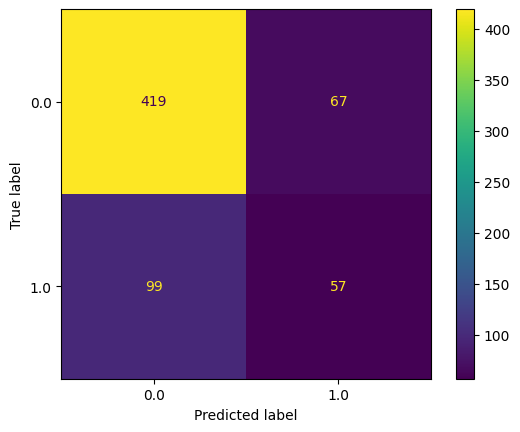

In [11]:
y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred))
print('Recall ',recall_score(y_test, y_pred))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# mlp for regression fuel consumption
df = pd.read_csv('data/FuelConsumption.csv')